In [42]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [49]:
ds=xr.open_mfdataset('./out_files/run2/combined_out.nc').sel(
    lat=slice(3,25),lon=slice(78,100))

In [50]:
ds['sl']=ds.pn/980
ds=ds.sl
ds=ds.where(ds<1000)
ds

<xarray.DataArray 'sl' (time: 1826, lat: 221, lon: 221)>
dask.array<where, shape=(1826, 221, 221), dtype=float32, chunksize=(1826, 221, 221), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float32 1.827e+03 1.828e+03 ... 3.651e+03 3.652e+03
  * lon      (lon) float32 78.0 78.1 78.2 78.3 78.4 ... 99.7 99.8 99.9 100.0
  * lat      (lat) float32 3.0 3.1 3.2 3.3 3.4 3.5 ... 24.6 24.7 24.8 24.9 25.0

In [51]:
tim=pd.date_range("02-01-1996", periods=1826)
tim_da = xr.DataArray(tim,[('time',tim)])

In [52]:
df=ds
#df=df.rename({'time':'tim_old'})
#df = df.expand_dims(time=tim_da)
df['time']=tim_da
#df = df.drop('tim_old')
df
#df.to_netcdf("lcs_era5_newdim.nc")

<xarray.DataArray 'sl' (time: 1826, lat: 221, lon: 221)>
dask.array<where, shape=(1826, 221, 221), dtype=float32, chunksize=(1826, 221, 221), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1996-02-01 1996-02-02 ... 2001-01-30
  * lon      (lon) float32 78.0 78.1 78.2 78.3 78.4 ... 99.7 99.8 99.9 100.0
  * lat      (lat) float32 3.0 3.1 3.2 3.3 3.4 3.5 ... 24.6 24.7 24.8 24.9 25.0

In [59]:
def BoB_plot(input_data):
########## Data ########
    input_data=input_data.rename({input_data.dims[0]:'time'})
    datasets={}
    for i in range(1996,2000):
        summer_unfiltered=input_data.sel(time=slice(repr(i)+'-06-01',repr(i)+'-08-31')).mean(dim='time')
        datasets[i]=[]
        datasets[i].append(summer_unfiltered)
    lon=input_data[input_data.dims[2]].data
    lat=input_data[input_data.dims[1]].data
########## Info ######
    Summer_enso_info={}
    Summer_enso_info=dict({1993:None,1994:'ME, ONI:0.4',1995:'ML, ONI:-0.2',1996: None,1997:'VSE, ONI:1.6',
                        1998:'SL, ONI:-0.8',1999:'SL, ONI:-1.1',2000:'WL, ONI:-0.6',2001:None,2002:'ME, ONI:0.8',
                        2003:None,2004:'WE, ONI:0.5',2005:'WL, ONI:-0.1',2006:'WE, ONI:0.1',2007:'SL, ONI:-0.5',
                        2008:'WL, ONI:-0.4',2009:'ME, ONI:0.5',2010:'SL, ONI:-1.0',2011:'ML, ONI:-0.5',2012:None,
                        2013:None,2014:'WE, ONI:0.1',2015:'VSE, ONI:1.5',2016:'WL, ONI:-0.4',2017:'WL, ONI:0.1',
                        2018:'WE, ONI:0.1',2019:None,2020:'ML, ONI:-0.4',2021:'ML, ONI:-0.4'})

    Elnino_years=[1994,1997,2002,2004,2006,2009,2014,2015,2018]
    Lanina_years=[1995,1998,1999,2000,2005,2007,2008,2010,2011,2016,2017,2020,2021]
##########  Plotting ###########
    fig, axs = plt.subplots(nrows=3,ncols=2,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(15,12))
    axs=axs.flatten()
    y_label=set([0,5,10,15,20])
    x_label=set([20,21,22,23,24])
    L2=[-20,-17.5,-15,-12.5,-10,-7.5,-5,-2.5,0,2.5,5,7.5,10,12.5,15,17.5,20]
    for i,year in enumerate(datasets):
            data=datasets[year]
            cs=axs[i].contourf(lon,lat,data[0],
                              levels=L2,transform = ccrs.PlateCarree(),
                              cmap='seismic',extend='both')
            axs[i].set_extent([78,100,4,25])
            axs[i].set_title(year,fontsize = 15, weight='bold')
            axs[i].coastlines()
            if i in y_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.bottom_labels = False
                gl.right_labels = False
                #gl.xlines=False
            if i in x_label:
                gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0,)
                gl.top_labels = False
                gl.left_labels = False
                gl.right_labels = False
            if year in Elnino_years:
                axs[i].text(88,23.5, Summer_enso_info[year],color='red', fontsize = 9,weight='bold')
            if year in Lanina_years:
                axs[i].text(88,23.5, Summer_enso_info[year],color='blue', fontsize = 9,weight='bold')

    cb_ax=fig.add_axes([0.93,0.2,0.02,0.6])
    cba=fig.colorbar(cs,cax=cb_ax)
    #plt.suptitle(title,fontsize = 30,weight='bold')
    #plt.savefig(output,dpi=120)
    
    return 

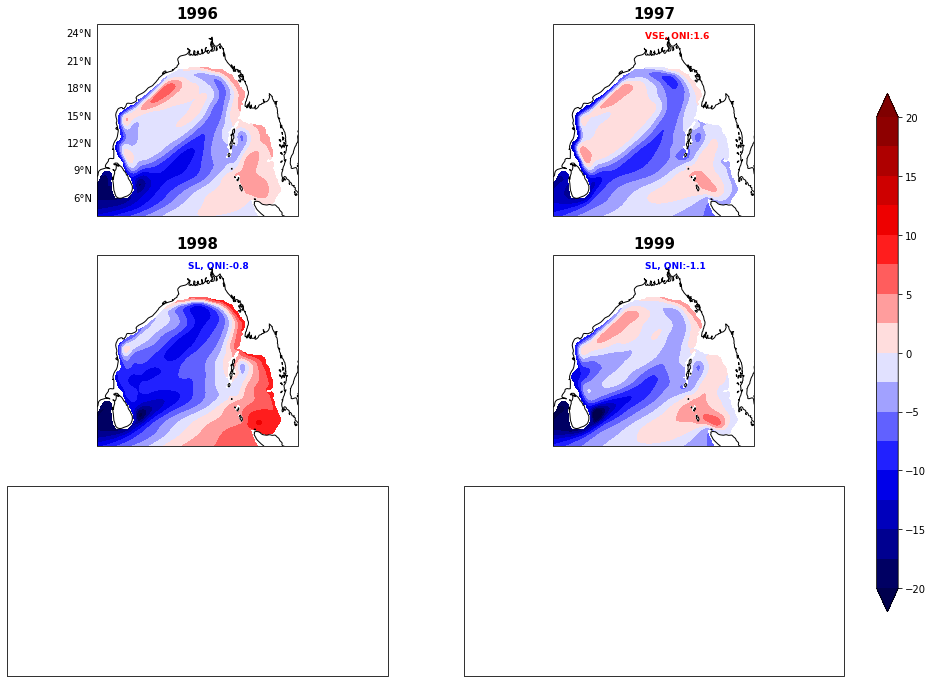

In [60]:
BoB_plot(df)

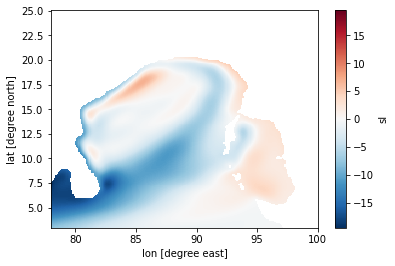

In [55]:
sum1996=df.sel(time=slice('1996-06-01','1996-08-30')).mean(dim='time')
sum1996.plot()